In [1]:
pip install cvxpy

  Using cached ecos-2.0.7.post1-cp38-cp38-win_amd64.whl
  Using cached osqp-0.6.2.post0-cp38-cp38-win_amd64.whl (162 kB)
  Using cached scs-2.1.4-cp38-cp38-win_amd64.whl
  Using cached qdldl-0.1.5.post0-cp38-cp38-win_amd64.whl (74 kB)
Note: you may need to restart the kernel to use updated packages.


In [69]:
# Least Squares
import cvxpy as cp
import numpy as np

# Generate data.
m = 20
n = 15
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Define and solve the CVXPY problem.
x = cp.Variable(n)
cost = cp.sum_squares(A @ x - b)
#prob = cp.Problem(cp.Minimize(cost))
prob = cp.Problem(cp.Minimize(cost),[A @ x <= b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", cp.norm(A @ x - b, p=2).value)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd


The optimal value is 12.064078457396832
The optimal x is
[ 0.27192238 -0.0926541  -0.10109801  0.2754236  -0.40482172 -0.02068833
  0.40020757 -0.19660797  0.04158516 -0.56640164  0.51811345 -0.54372384
  0.28586764 -0.04818531 -0.61231984]
The norm of the residual is  3.473338229628211


In [59]:
import pandas as pd
df1 = pd.read_csv('trend_compressed_sensing_N.csv')
df2 = pd.read_csv('trend_compressed_sensing_C.csv')
df3 = pd.read_csv('trend_compressed_sensing_R.csv')

cit_N=df1['Citation'].to_list()
year_N=df1['Year'].to_list()

cum_2019=0
cum_2020=0
cum_2021=0

for n in range(len(year_N)):
    if year_N[n]==2019:
        cum_2019+=cit_N[n]
    if year_N[n]==2020:
        cum_2020+=cit_N[n]
    if year_N[n]==2021:
        cum_2021+=cit_N[n]
        
N=[cum_2019,cum_2020,cum_2021]
#---------------------------------------------------------
#---------------------------------------------------------
cit_C=df2['Citation'].to_list()
year_C=df2['Year'].to_list()
cum_2019=0
cum_2020=0
cum_2021=0

for n in range(len(year_C)):
    if year_C[n]==2019:
        cum_2019+=cit_C[n]
    if year_C[n]==2020:
        cum_2020+=cit_C[n]
    if year_C[n]==2021:
        cum_2021+=cit_C[n]
        
C=[cum_2019,cum_2020,cum_2021]
#---------------------------------------------------------
#---------------------------------------------------------
cit_R=df3['Citation'].to_list()
year_R=df3['Year'].to_list()
cum_2019=0
cum_2020=0
cum_2021=0

for n in range(len(year_R)):
    if year_R[n]==2019:
        cum_2019+=cit_R[n]
    if year_R[n]==2020:
        cum_2020+=cit_R[n]
    if year_R[n]==2021:
        cum_2021+=cit_R[n]
        
R=[cum_2019,cum_2020,cum_2021]

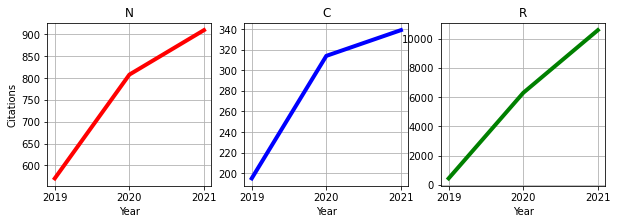

In [56]:
import matplotlib.pyplot as plt
import numpy as np

year=['2019','2020','2021']
N_cum=list(np.cumsum(N))
C_cum=list(np.cumsum(C))
R_cum=list(np.cumsum(R))


f = plt.figure(figsize=(10,3))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax.plot(year,N_cum,'r',linewidth=4)
ax.set_title('N')
ax.set_ylabel('Citations')
ax.set_xlabel('Year')
ax2.plot(year,C_cum, 'b',linewidth=4)
ax2.set_title('C')
ax2.set_xlabel('Year')
ax3.plot(year,R_cum, 'g',linewidth=4)
ax3.set_title('R')
ax3.set_xlabel('Year')
ax.grid()
ax2.grid()
ax3.grid()
plt.savefig('compressed_sensing.jpg', dpi=1000, bbox_inches='tight')

In [10]:
# Nedler Mead

from scipy.optimize import minimize
from numpy.random import rand
from scipy.fft import fft, ifft, fftfreq
import numpy as np
from numpy import pi
 
N=np.array(N)
C=np.array(C)
R=np.array(R)
 
# objective function
def objective(p):
    L= N.shape[0]
    T = 1.0 /L
    x = np.linspace(0.0, L*T, L, endpoint=False)
    xf = fftfreq(L, T)[:L//2]
    omega=2*pi*xf
    
    Nf = fft(N)
    Nfp=2.0/L * np.abs(Nf[0:L//2])
    
    Cf = fft(C)
    Cfp=2.0/L * np.abs(Cf[0:L//2])
    
    Rf = fft(R)
    Rfp=2.0/L * np.abs(Rf[0:L//2])
    
    Ox=np.ones(L)
    O=Ox[0:L//2]
    Of=fft(np.ones(L))
    Ofp=2.0/L * np.abs(Of[0:L//2])
    
    NC=np.multiply(N,C)
    NfCf = fft(NC)
    NfpCfp=2.0/L * np.abs(NfCf[0:L//2])
    
    
#     return np.sum(np.absolute(1j*np.multiply(omega,Nfp)-N[0]*O-p[0]*Ofp+p[1]*Nfp)+
#                   np.absolute(1j*np.multiply(omega,Cfp)-C[0]*O+p[1]*Nfp-p[2]*Rfp)+
#                   np.absolute(1j*np.multiply(omega,Rfp)-R[0]*O+p[2]*Rfp))
 
    return np.sum(np.square(np.absolute(1j*np.multiply(omega,Nfp)-N[0]*O+p[1]*NfpCfp))+
                  np.square(np.absolute(1j*np.multiply(omega,Cfp)-C[0]*O-p[1]*NfpCfp+p[2]*Cfp))+
                  np.square(np.absolute(1j*np.multiply(omega,Rfp)-R[0]*O-p[2]*Cfp+p[0])))+p[3]*np.sum(np.square(np.absolute(N)-N)+np.square(np.absolute(C)-C)+np.square(np.absolute(R)-R))
    
Iter=100

ta=[]
alp=[]
bet=[]
eva=[]
lam=[]

for it in range(Iter):

    # range for input
    r_min, r_max = 0, 10000.0
    # starting point as a random sample from the domain
    pt = r_min + rand(4) * (r_max - r_min)

    result = minimize(objective, pt, method='nelder-mead')
    # summarize the result
    print('Status : %s' % result['message'])
    print('Total Evaluations: %d' % result['nfev'])
    # evaluate solution
    solution = result['x']
    evaluation = objective(solution)
# print('Solution: f(%s) = %.5f' % (solution, evaluation))


    tau=solution[0]
    alpha=solution[1]
    beta=solution[2]
    lamb=solution[3]
    ta.append(tau)
    alp.append(alpha)
    bet.append(beta)
    lam.append(lamb)
    eva.append(evaluation)

from operator import itemgetter
index, element = min(enumerate(eva), key=itemgetter(1))

tau=ta[index]
alpha=alp[index]
beta=bet[index]
lamb=lam[index]
evaler=eva[index]

print("Tau: ",tau)
print("Alpha: ",alpha)
print("Beta: ",beta)
print("Evaluation: ",evaler)

Status : Optimization terminated successfully.
Total Evaluations: 791
Status : Maximum number of function evaluations has been exceeded.
Total Evaluations: 801
Status : Optimization terminated successfully.
Total Evaluations: 739
Status : Optimization terminated successfully.
Total Evaluations: 705
Status : Optimization terminated successfully.
Total Evaluations: 380
Status : Optimization terminated successfully.
Total Evaluations: 767
Status : Optimization terminated successfully.
Total Evaluations: 710
Status : Maximum number of function evaluations has been exceeded.
Total Evaluations: 801
Status : Maximum number of function evaluations has been exceeded.
Total Evaluations: 801
Status : Optimization terminated successfully.
Total Evaluations: 750
Status : Optimization terminated successfully.
Total Evaluations: 731
Status : Optimization terminated successfully.
Total Evaluations: 784
Status : Optimization terminated successfully.
Total Evaluations: 780
Status : Optimization terminat

In [62]:

#Visualization


from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
from scipy.fft import fft, ifft, fftfreq
from mpl_toolkits.mplot3d import Axes3D




 
# objective function
def objective(xq,yq,zq,lambd):
    
    
    
    
    L= N.shape[0]
    T = 1.0 /L
    x = np.linspace(0.0, L*T, L, endpoint=False)
    xf = fftfreq(L, T)[:L//2]
    omega=2*pi*xf
    
    Nf = fft(N)
    Nfp=2.0/L * np.abs(Nf[0:L//2])
    
    Cf = fft(C)
    Cfp=2.0/L * np.abs(Cf[0:L//2])
    
    Rf = fft(R)
    Rfp=2.0/L * np.abs(Rf[0:L//2])
    
    Ox=np.ones(L)
    O=Ox[0:L//2]
    Of=fft(np.ones(L))
    Ofp=2.0/L * np.abs(Of[0:L//2])
    
    NC=np.multiply(N,C)
    NfCf = fft(NC)
    NfpCfp=2.0/L * np.abs(NfCf[0:L//2])
    
    
#     return np.sum(np.absolute(1j*np.multiply(omega,Nfp)-N[0]*O-p[0]*Ofp+p[1]*Nfp)+
#                   np.absolute(1j*np.multiply(omega,Cfp)-C[0]*O+p[1]*Nfp-p[2]*Rfp)+
#                   np.absolute(1j*np.multiply(omega,Rfp)-R[0]*O+p[2]*Rfp))
    p=[xq,yq,zq,lambd]
    return np.sum(np.square(np.absolute(1j*np.multiply(omega,Nfp)-N[0]*O+p[1]*NfpCfp))+
                  np.square(np.absolute(1j*np.multiply(omega,Cfp)-C[0]*O-p[1]*NfpCfp+p[2]*Cfp))+
                  np.square(np.absolute(1j*np.multiply(omega,Rfp)-R[0]*O-p[2]*Cfp+p[0])))+p[3]*np.sum(np.square(np.absolute(N)-N)+np.square(np.absolute(C)-C)+np.square(np.absolute(R)-R))
    
 
 
    
    

# define range for input
r_min, r_max = -2, 4
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.5)
yaxis = arange(r_min, r_max, 0.5)
# create a mesh from the axis
xq, yq = meshgrid(xaxis, yaxis)

zq=tau
lambd=lamb

results=np.zeros((xq.shape[0],xq.shape[0]))
for i in range(xq.shape[0]):
    for j in range(yq.shape[0]):
        results[i,j]= objective(zq,xaxis[i],yaxis[j],lambd)
        # results[i,j]=np.log(results[i,j])
    

# create a surface plot with the jet color scheme
figure = pyplot.figure(figsize=(8, 10))
axis = figure.gca(projection='3d')
axis.plot_surface(xq, yq, results, cmap='jet')
axis.set_xlabel('alpha')
axis.set_ylabel('beta')
axis.set_zlabel('Objective')
# show the plot
pyplot.show()
figure.savefig('objective.png',dpi=1000, bbox_inches='tight')

AttributeError: 'list' object has no attribute 'shape'

In [12]:
def vectorfield(w, t, p):

    N,C,R = w
    tau, alpha, beta = p

    f = [-alpha*N*C,
         alpha*N*C-beta*C,
         beta*C-tau]
    return f

In [29]:

from scipy.integrate import odeint


NN=N
CC=C
RR=R

No=N[2]
Co=C[2]
Ro=R[2]

abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250


t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [tau,alpha,beta]
w0 = [No,Co,Ro]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


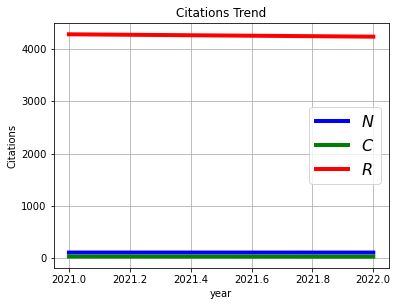

In [30]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel,ylabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties

N=wsol[:,0]
C=wsol[:,1]
R=wsol[:,2]

figure(1, figsize=(6, 4.5))

xlabel('year')
ylabel('Citations')
grid(True)

lw = 4
time=np.arange(2021,2023)
plot(time, N[0:2], 'b', linewidth=lw)
plot(time, C[0:2], 'g', linewidth=lw)
plot(time, R[0:2], 'r', linewidth=lw)

legend((r'$N$', r'$C$', r'$R$'), prop=FontProperties(size=16))
title('Citations Trend')
savefig('NCR_trend.png', dpi=1000)

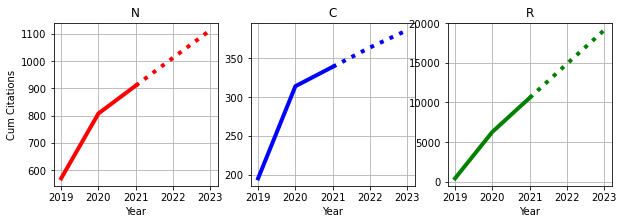

In [43]:
f = plt.figure(figsize=(10,3))

lenny=5

year=np.arange(2019,2019+lenny)
year=list(year)

n=[]
c=[]
r=[]


for k in range(lenny-2):
    n.append(N[k])
    c.append(C[k])
    r.append(R[k])

n_cum=list(np.cumsum(NN+n))
c_cum=list(np.cumsum(CC+c))
r_cum=list(np.cumsum(RR+r))
NN_cum=list(np.cumsum(NN))
CC_cum=list(np.cumsum(CC))
RR_cum=list(np.cumsum(RR))


ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)
ax.plot(year[2:lenny],n_cum[2:lenny],'r:',linewidth=4)
ax.plot(year[0:3],NN_cum,'r',linewidth=4)
ax.set_title('N')
ax.set_ylabel('Cum Citations')
ax.set_xlabel('Year')
ax2.plot(year[2:lenny],c_cum[2:lenny], 'b:',linewidth=4)
ax2.plot(year[0:3],CC_cum,'b',linewidth=4)
ax2.set_title('C')
ax2.set_xlabel('Year')
ax3.plot(year[2:lenny],r_cum[2:lenny], 'g:',linewidth=4)
ax3.plot(year[0:3],RR_cum,'g',linewidth=4)
ax3.set_title('R')
ax3.set_xlabel('Year')
ax.grid()
ax2.grid()
ax3.grid()
plt.savefig('compressed_sensing_predicted.jpg', dpi=1000, bbox_inches='tight')